In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
data = pd.read_csv(r"data.csv")
data.Date = pd.to_datetime(data.Date)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Revenue                         2184 non-null   float64       
 1   Gross Profit                    2184 non-null   float64       
 2   Operating Income                2184 non-null   float64       
 3   Pretax Income                   2184 non-null   float64       
 4   Diluted EPS                     2184 non-null   float64       
 5   EBITDA                          2184 non-null   float64       
 6   ROA                             2184 non-null   float64       
 7   ROE                             2184 non-null   float64       
 8   Total Current Assets            2184 non-null   float64       
 9   Total Long-Term Assets          2184 non-null   float64       
 10  Total Assets                    2184 non-null   float64       
 11  Tota

In [18]:
data.head()

,Revenue,Gross Profit,Operating Income,Pretax Income,Diluted EPS,EBITDA,ROA,ROE,Total Current Assets,Total Long-Term Assets,Total Assets,Total Current Liabilities,Total Noncurrent Liabilities,Total Liabilities,Total Equity,Cash from Operations,Cash from Investing Activities,Cash from Financing Activities,Date,Company
0,0.000,0.000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,2011-03-31,AMPY
1,0.000,0.000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,2011-06-30,AMPY
2,0.000,0.000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,2011-09-30,AMPY
3,61.863,25.009,-32.289,-33.640,0.000000,-2.230,0.016981,0.032987,48.110,576.545976,624.656000,85.854,253.300,339.154,285.502016,38.239,-79.880,38.765,2011-12-31,AMPY
4,48.410,13.782,2.342,0.659,-0.086831,30.369,0.000000,0.000000,42.309,646.299976,688.609024,147.718,272.896,420.614,267.995008,34.316,-72.466,40.000,2012-03-31,AMPY


In [54]:
train_data = data[data.Date < '2020-09-30']
test_data = data[data.Date >= '2020-09-30']

### **EDA**

Кол-во строк, состоящих из нулей на ... %:
- 10%, 284 шт.
- 20%, 213 шт.
- 30%, 207 шт.
- 40%, 206 шт.
- 80%, 199 шт.
- 100%, 198 шт.

Избавлюсь от строк которые состоят из нулей более чем на 20%. В тестовом наборе данных нулей нет.

In [55]:
train_data = train_data.loc[~((train_data.drop(columns = ['Date', 'Company']) == 0).sum(axis=1) / 18 >= 0.2)]

По некоторым компаниями довольно мало строк, например 6 по MNRL 6, 10 по BRY

In [56]:
train_data.groupby('Company')['Revenue'].count()

Company
AMPY    35
APA     38
AR      35
BATL    38
BCEI    38
BRY     10
BSM     22
CDEV    18
CHK     38
CLR     38
CNX     38
COG     38
COP     38
CPE     38
CRC     23
CRK     38
DEN     38
DVN     38
EGY     38
EOG     38
EQT     38
ESTE    38
FANG    36
GDP     38
HES     38
LONE    18
LPI     36
MCF     38
MGY     10
MNRL     6
MRO     38
MTDR    38
MUR     38
NOG     38
OAS     38
OVV     38
PDCE    38
PVAC    38
PXD     38
REI     31
RRC     38
SBOW    37
SD      38
SM      38
SWN     38
TALO    38
TPL     38
VNOM    23
WLL     38
WTI     38
XEC     38
XOG     17
Name: Revenue, dtype: int64

Агрегации по признакам компаний

In [61]:
train_data.groupby('Company').agg(['mean', 'std', 'min', 'max']).head()

C:\Users\andre\AppData\Local\Temp\ipykernel_12564\3285247391.py:1: FutureWarning: ['Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  train_data.groupby('Company').agg(['mean', 'std', 'min', 'max']).head()


Revenue                                       Gross Profit  \
                mean          std         min          max         mean   
Company                                                                   
AMPY       86.595971    40.351310   35.171000   166.518000    34.197885   
APA      2531.868423  1266.973880  596.000000  4496.000000   919.052645   
AR        666.782028   348.227310   92.034000  1242.779008   239.349024   
BATL      136.569711    99.403966   24.197000   311.999008    56.841106   
BCEI       73.961080    34.645923   21.436696   155.376992    32.458738   

                                          Operating Income              ...  \
                std      min          max             mean         std  ...   
Company                                                                 ...   
AMPY      19.728446   -1.819    76.038000        15.581714   19.808000  ...   
APA      776.937808 -208.000  2329.999872       777.625250  797.214330  ...   
AR       144.626727   34.724   549.396032       103.262915   90.119006  ...   
BATL      44.160439    4.862   144.127000        30.384658   36.281967  ...   
BCEI      17.595804    0.925    70.267000        15.175802   20.126315  ...   

        Cash from Operations              Cash from Investing Activities  \
                         min          max                           mean   
Company                                                                    
AMPY                 -22.509   135.020000                     -83.460371   
APA                   84.000  2792.000000                   -1262.184207   
AR                    41.736  1045.222016                    -576.814284   
BATL                 -36.834   251.442000                    -202.218764   
BCEI                 -39.369   125.760504                     -71.806396   

                                               Cash from Financing Activities  \
                 std          min          max                           mean   
Company                                                                         
AMPY      149.529105  -748.793984    66.925000                      44.255686   
APA      1498.226978 -4944.000000  4391.000064                     -82.315789   
AR        380.645513 -1864.883968   124.699000                     293.035660   
BATL      383.689278 -1220.150016  1317.787008                     143.760314   
BCEI       69.376474  -354.736000    37.082000                      35.024138   

                                               
                std          min          max  
Company                                        
AMPY     155.956422  -182.574000   699.817024  
APA      812.786766 -2712.000000  2268.000000  
AR       416.261584  -510.952992  1525.542016  
BATL     296.439849  -438.476992  1122.048000  
BCEI      69.094973   -59.937000   292.806016  

[5 rows x 72 columns]

### **Visualisation**

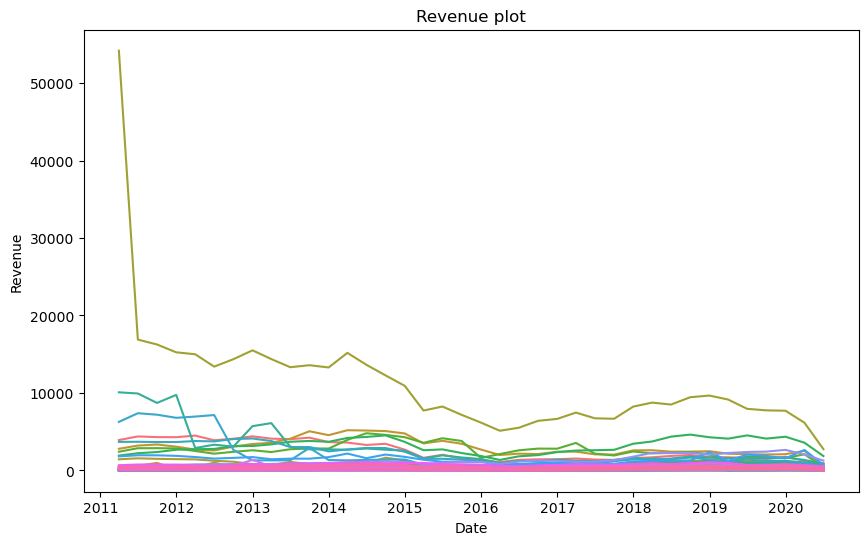

In [77]:
plt.figure(figsize = (10,6))
plt.title("Revenue plot")
sns.lineplot(data=train_data, x="Date", y="Revenue", hue="Company", legend = False)
plt.show()

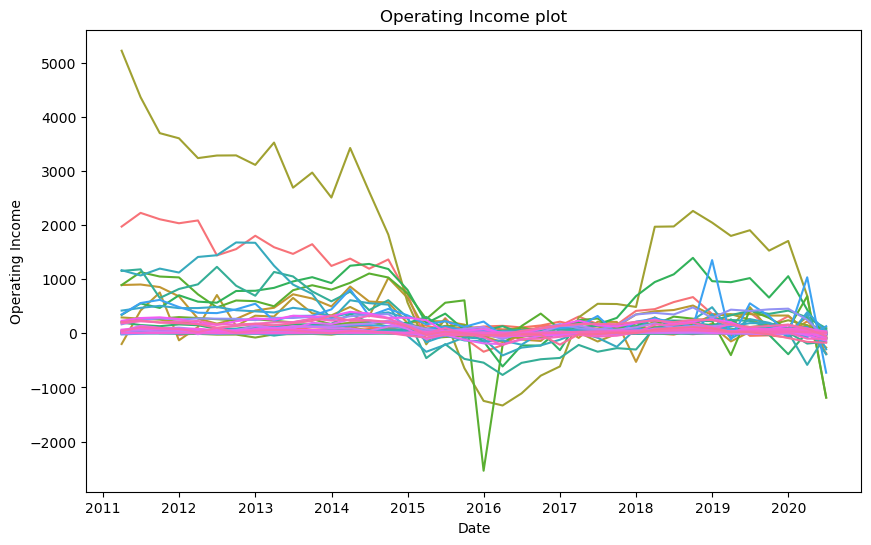

In [ ]:
plt.figure(figsize = (10,6))
plt.title("Operating Income plot")
sns.lineplot(data=train_data, x="Date", y="Operating Income", hue="Company", legend = False)
plt.show()

Данные сильно скоррелированы, поэтому могут возникнуть проблемы с линейными моделями, однако с этим легко побороться L1 / L2 регуляризацией

In [83]:
corr=train_data.corr()

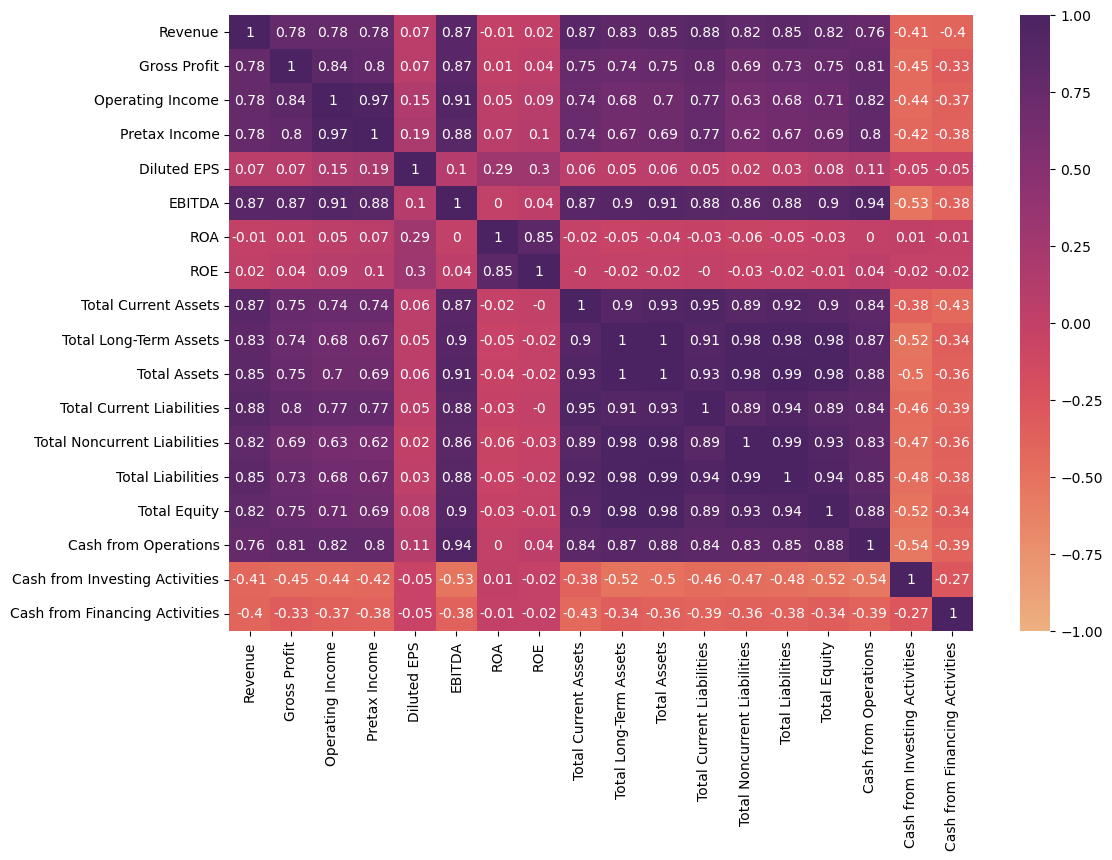

In [95]:
plt.figure(figsize=(12, 8))
sns.heatmap(np.around(corr, decimals = 2), vmin=-1, vmax=1, cmap='flare', annot=True)
plt.show()

[]

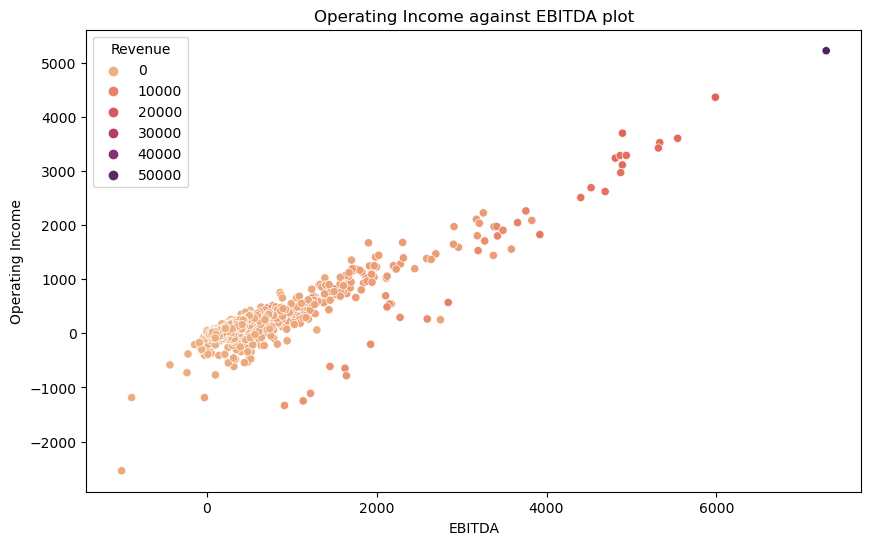

In [91]:
plt.figure(figsize = (10,6))
plt.title("Operating Income against EBITDA plot")
sns.scatterplot(data=train_data, x="EBITDA", y="Operating Income", hue = 'Revenue', palette = 'flare')
plt.plot()

### **Metric**

Если мы хотим выбрать общую метрику качества для нашей задачи, то нам не подойдет MAE, MSE и т.д. От компании к компании они могут сильно варьироваться, так для одной компании MAE=10000 может быть потрясающим результатом, то для другой ужасным. Думаю для данной задачи подойдет метрика качества MAPE, так как она показывает ошибку в процентах, посчитаем MAPE для каждой компании, а затем усредним их и найдем среднюю ошибку в процентах для всех компаний 